# Introduction
With this project we are setting out to determine the best neigborhood in Pittsburgh. To do this, we found various datasets that represented different areas citizen behavior. We used Pandas and Python to visualize this data and allow us to draw conclusions. We each chose our dataset separately and talked about how best to tie them together. 

# The Metric
The overarching metric we are measuring is the personal responsilibilty of the citizens. To do this wer are measuring # of Covid-19 Vaccinations, arrest reports and number of dog licenses. 

A high vaccination rate in a neighborhood indicates that residents are taking responsibility for their own health and the health of the community by getting vaccinated. A low number of arrests in a neighborhood indicates that residents are taking responsibility for safety within their community. A high number of dog licenses indicates that residents are repsonible pet owners in registering their dogs and following local pet laws.

In [2]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Submetric 1: Crime

In [16]:
Arrest = pd.read_csv("Arrest in Pittsburgh.csv")
arrest = Arrest.groupby('INCIDENTNEIGHBORHOOD').count().sort_values(by=['OFFENSES'], ascending=True)
arrest

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,,
Mt. Oliver Neighborhood,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Troy Hill-Herrs Island,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5
Mt. Oliver Boro,18,18,18,18,18,18,18,18,18,18,18,18,7,7,16,16
Central Northside,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Ridgemont,37,37,37,37,37,37,37,37,37,37,37,37,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Homewood South,2090,2090,2090,2081,2090,2090,2090,2090,2089,2090,2090,2090,1917,1917,1954,1954
East Allegheny,2217,2217,2217,2211,2217,2217,2217,2217,2216,2217,2217,2217,2127,2127,2136,2136
Carrick,2351,2351,2351,2329,2351,2351,2351,2351,2351,2351,2351,2351,2123,2123,2145,2145


This is the number of arrests recorded from highest to lowest in each neighborhood in Pittsburgh.The top five neighborhoods with the highest arrest rates are "Central Business District", "South Side Flats", "Carrick", "East Allegheny" and "Homewood South". The top five neighborhoods with the lowest arrest rates are "Mt. Oliver Neighborhood", "Troy Hill-Herrs Island", "Mt. Oliver Boro", "Central Northside" and "Ridgemont".

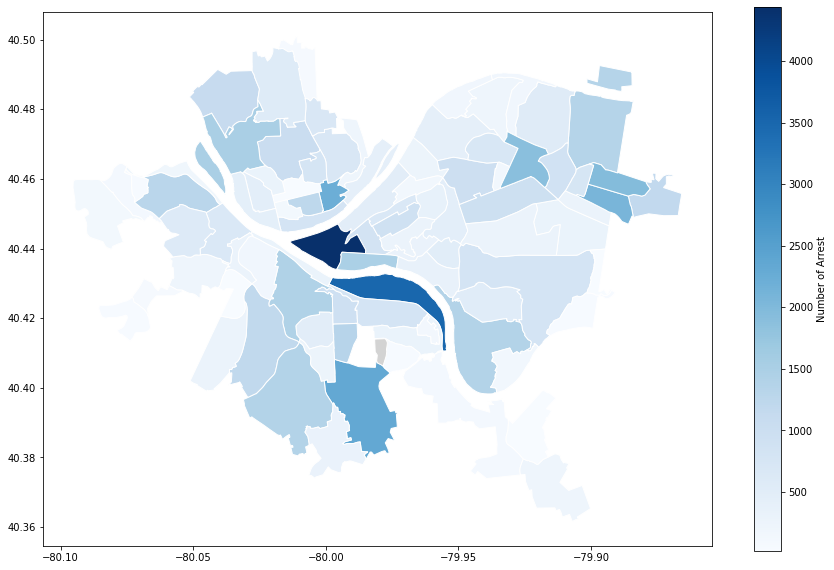

In [17]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") 
arrest_map = neighborhoods.merge(arrest, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
arrest_map.plot(column='OFFENSES', 
               cmap='Blues',             
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number of Arrest"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
               )

Finally, I used a map of Pittsburgh to better illustrate the security situation of each neighborhood. The darker the color, the higher the crime rate. Conversely, the lighter the color, the lower the crime rate in the community. Therefore, it is clear from the map that there are neighborhoods with higher crime rates in the north, south, and center of Pittsburgh. In contrast, neighborhoods on the east and west sides of Pittsburgh are relatively safe.

In [83]:
crimeranks = {}
counter = 0
prev = -1
same = 1
for index,row in arrest.iterrows():
    if row['OFFENSES'] == prev: #takes account of duplicates
        same = same + 1
    else:
        counter = counter + same #after no more duplicate values
        same = 1
    crimeranks[index]= counter # creates the rank
    prev = row['OFFENSES']
crimeranks = crimeranks.items()
column = ["neighborhood","crimerank"]
crimeranks = pd.DataFrame(crimeranks, columns=column) #creates the dataframe
crimeranks

,neighborhood,crimerank
0,Mt. Oliver Neighborhood,1
1,Troy Hill-Herrs Island,2
2,Mt. Oliver Boro,3
3,Central Northside,4
4,Ridgemont,5
...,...,...
93,Homewood South,94
94,East Allegheny,95
95,Carrick,96
96,South Side Flats,97


# Sub-Conclusion 1:
Through the data, the top five neighborhoods with the highest arrest rates in Pittsburgh are "Central Business District", "South Side Flats", "Carrick", "East Allegheny" and "Homewood South". The top five neighborhoods in Pittsburgh with the lowest arrest rates are "Mt. Oliver Neighborhood", "Troy Hill-Herrs Island", "Mt. Oliver Boro", "Central Northside" and "Ridgemont". 

Although these five neighborhoods have the lowest crime rates, I have not heard of them. I think it may be that these neighborhoods have smaller populations, resulting in lower crime rates. Therefore, my data is one-dimensional and it can't tell you how good a neighborhood is, only how safe it is. My data is only a one dimensional look at the crime rate in a neighborhood in terms of arrest rates and does not take into account other variables such as population. A neighborhood with a low crime rate shows strong personal responsibility to the community.

The best neighborhood I found is Mt. Oliver Neighborhood with the lowest arrest rate. it may be the best in terms of policing, but in many ways it's not necessarily the best. It may be the best in terms of policing, but in many ways it's not necessarily the best. I live in North Oakland now, and my neighborhood doesn't present a bad number of arrests, and my neighborhood has a lot of good food and is close to the grocery store. So I think North Oakland is the best neighborhood for me.

# Submetric 2: COVID Vaccinations:

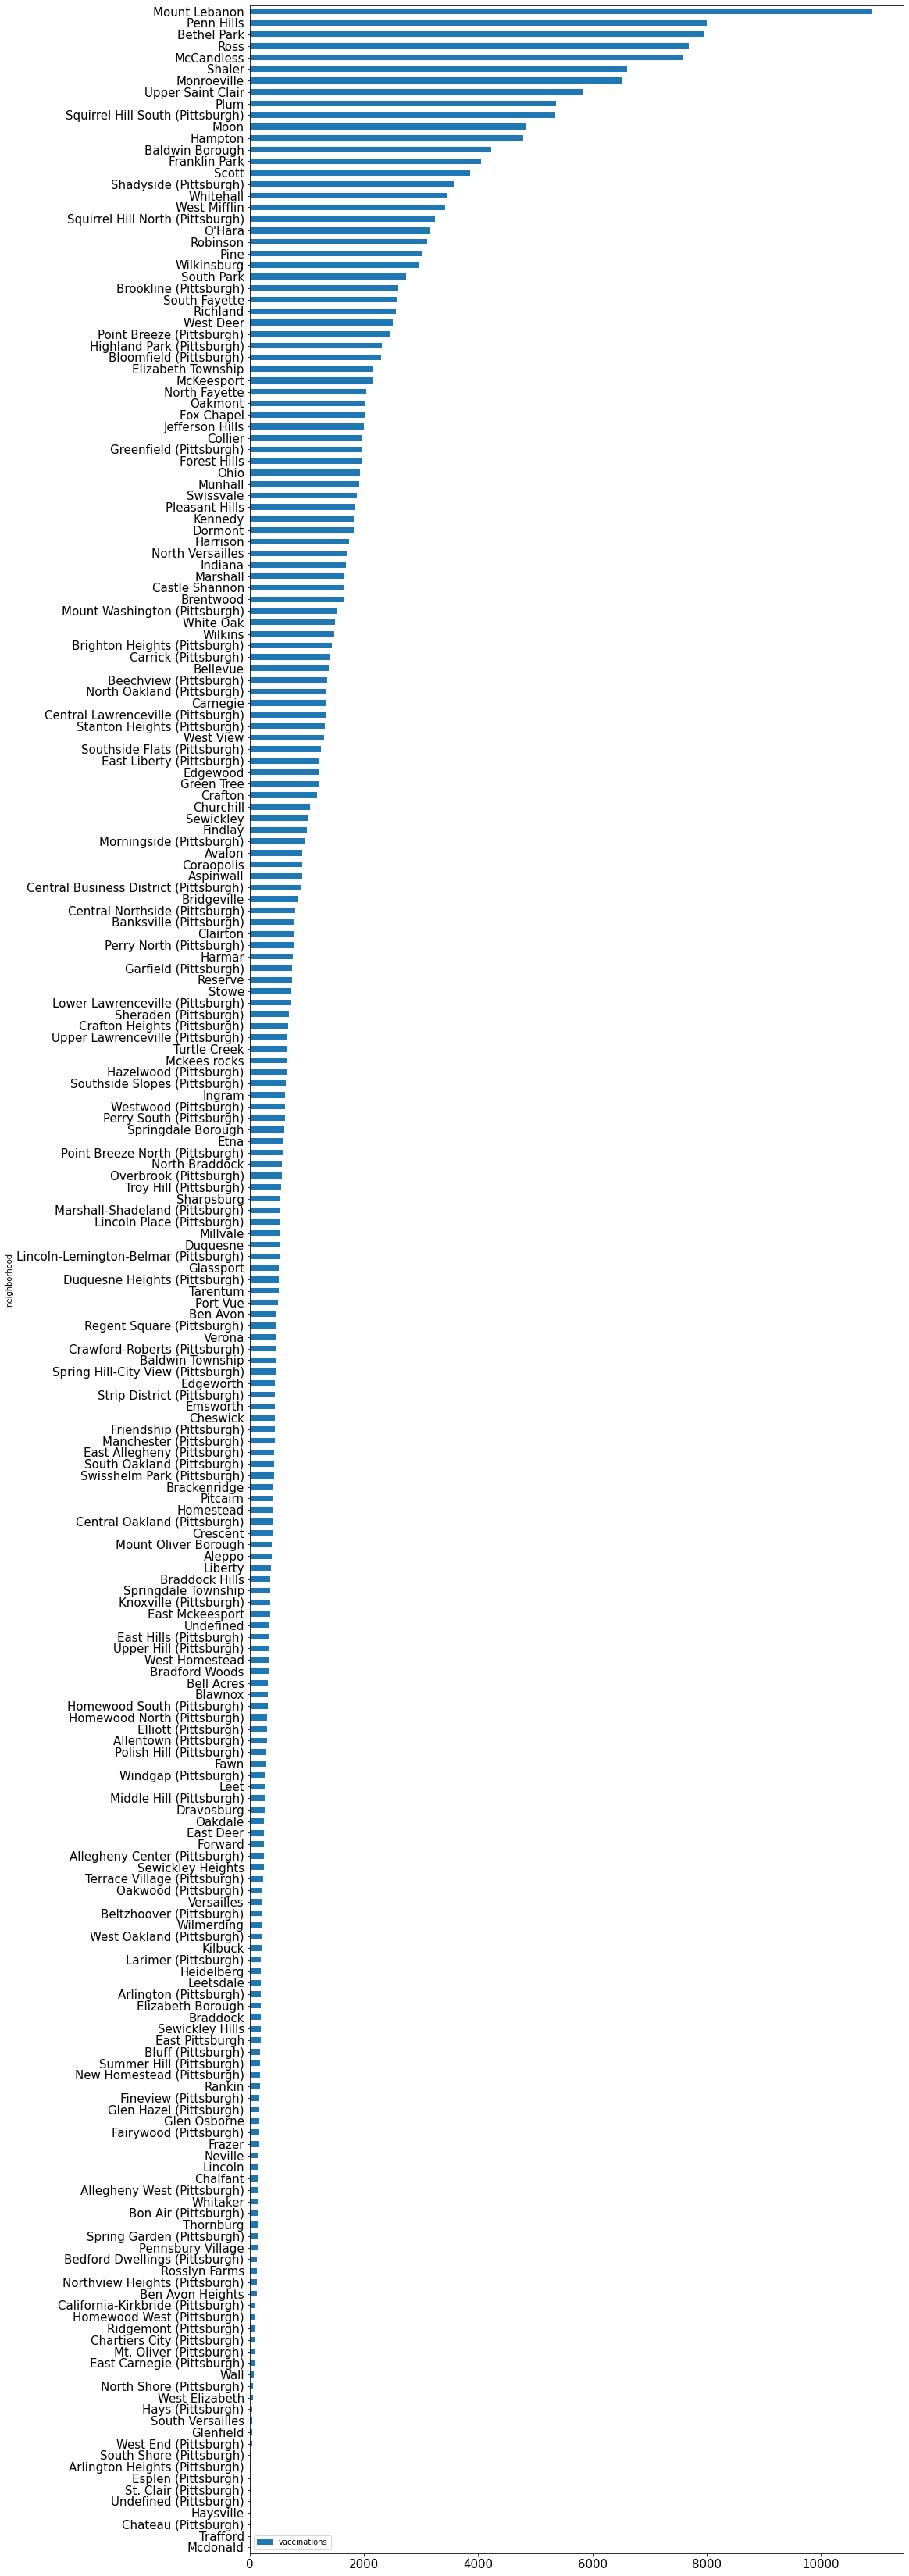

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("vaccine.csv")
dictary = {}

for index, row in data.iterrows():
    if row.neighborhood_municipality not in dictary:
        dictary[row.neighborhood_municipality] = row.bivalent_booster
    else:
        dictary[row.neighborhood_municipality] += row.bivalent_booster
        
final = pd.DataFrame(dictary.items(), columns=['neighborhood', 'vaccinations'])
final = final.sort_values(by=['vaccinations'])
final.plot(kind = 'barh', x = 'neighborhood', y = 'vaccinations', figsize=(15,60), fontsize = 15)

# Subconclusion 2:
Looking at the data, Mt Lebanon has the most vaccinations, followed closely by Penn Hills, Bethel Park and Ross. Hayseville, Trafford and Chateau all had no documented vaccinations while areas like the North Shore Glenfield and the West End all had only one or two documented vaccinations each. Through these observations we can infer that the neighborhoods with more vaccination are likely to be more considerate, responsible and likely better areas to live in than their less vaccinated counterparts. Of course, there are more reasons for not getting a vaccine than just a lack of responsibility, but larger trends can still give some context into the culture and general attitude of different neighborhoods. 

# Submetric 3: Dog Licenses

In [5]:
dog_data = pd.read_csv("DogLicense2024.csv")
dog_dictionary = {}
zip_codes = set()

for index, row in dog_data.iterrows():
    zip_codes.add(row.OwnerZip)
    if row.OwnerZip not in dog_dictionary:
        dog_dictionary[row.OwnerZip] = 1
    else:
        dog_dictionary[row.OwnerZip] += 1

zipcodes = pd.read_csv("zipcodes.csv")
zipcode_dict = {}

for index, row in zipcodes.iterrows():
    zipcode_dict[row.zip] = row['name']

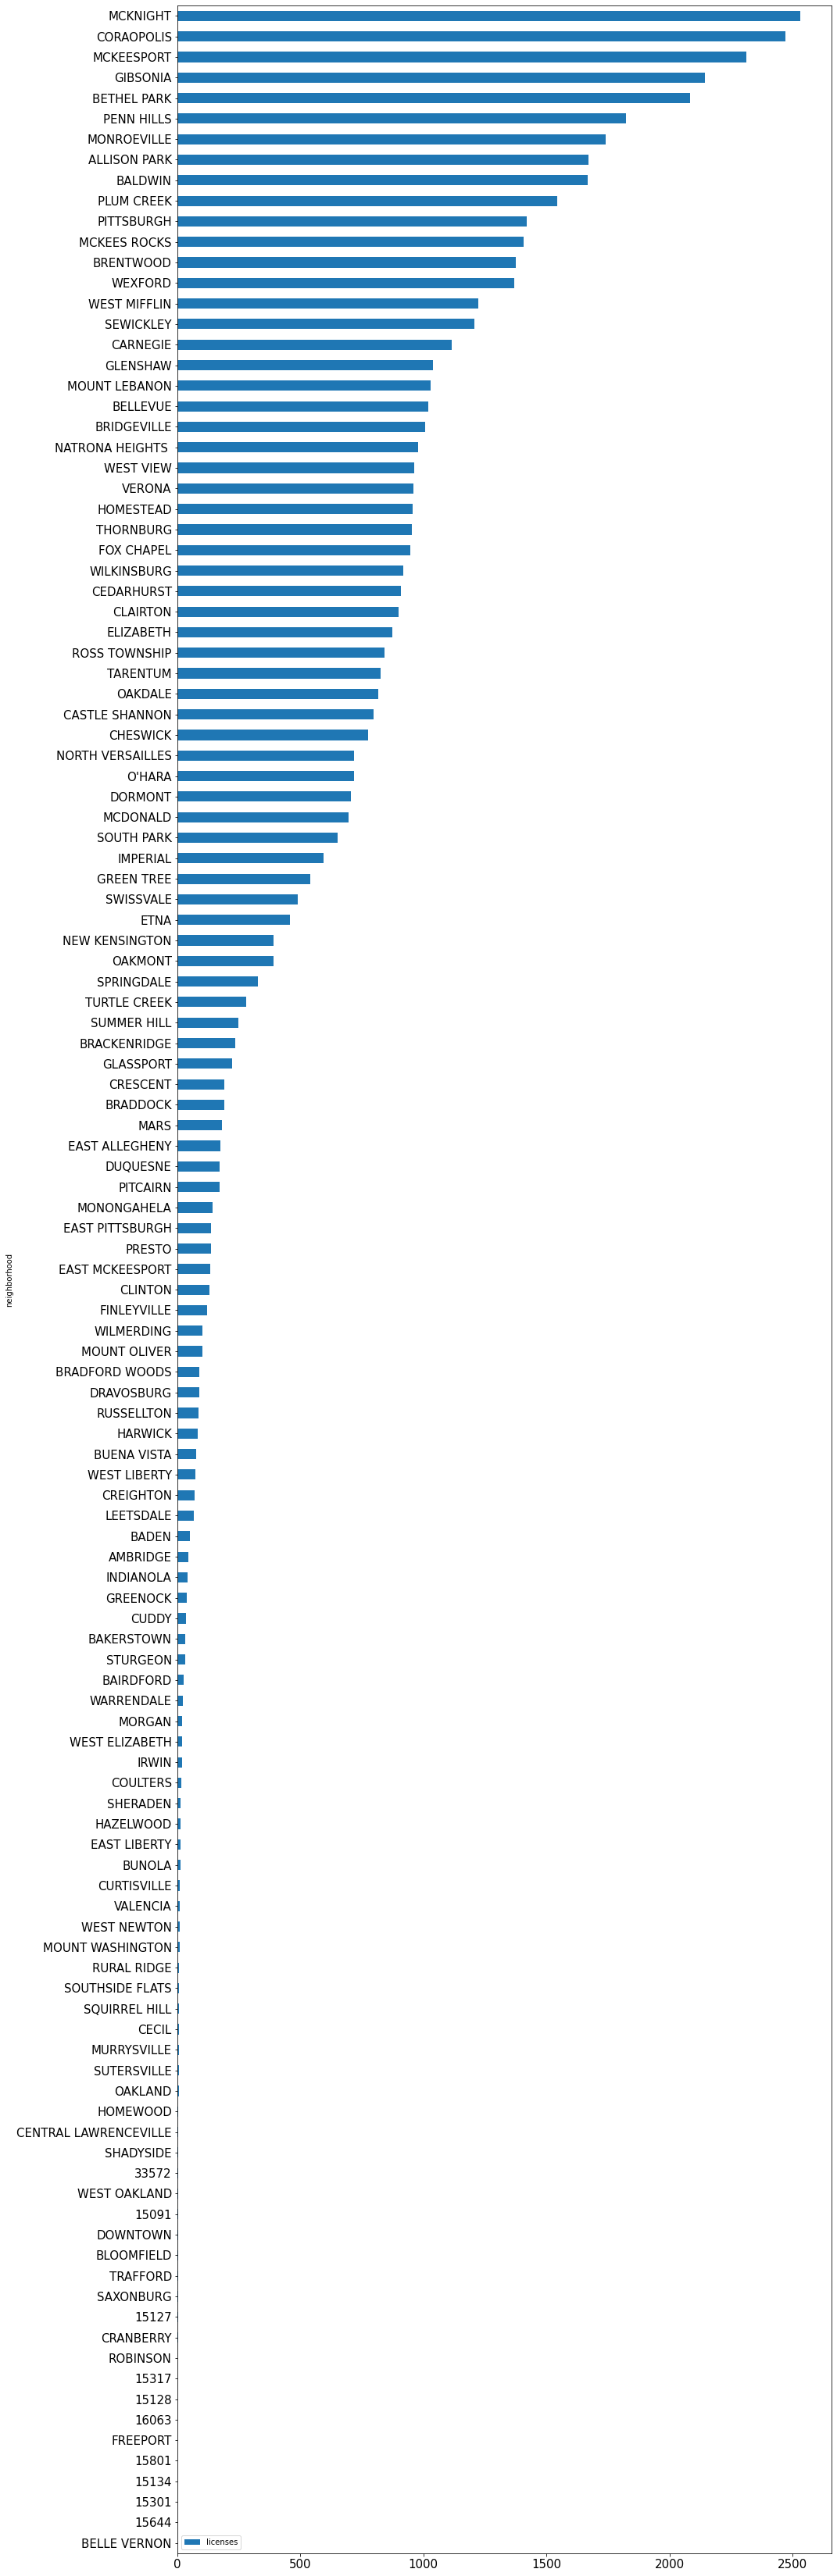

In [53]:
new_dict = {}
for key, item in dog_dictionary.items():
    if key in zipcode_dict:
        if zipcode_dict[key] in new_dict:
            new_dict[zipcode_dict[key]] += item
        else: 
            new_dict[zipcode_dict[key]] = item
    else:
        new_dict[key] = item

sorted_dict = dict(sorted(new_dict.items(), key=lambda item: item[1], reverse=False))
dog_final = pd.DataFrame(sorted_dict.items(), columns=['neighborhood', 'licenses'])
dog_final.head()

dog_final.plot(kind = 'barh', x = 'neighborhood', y = 'licenses', figsize=(15,60), fontsize = 15)

## Subconclusion 3: 

From this, we can tell that the top neighborhoods with the most dog licenses are McKnight, Coraopolis, McKeesport, Gibsonia, Bethel Park, and Penn Hills. For this, we can see that these neighborhoods probably have the most dog owners, which means they may be better equipped to provide a comfortable and supportive environment for owners and their pets, such as having nearby dog parks, pet-friendly businesses, or green space. This means the environment is probably more comfortable to live in. 

We can also see from the fact that these owners got licenses for their pets that the owners living in these neighborhoods are responsible for their pet's wellbeings. 

# The Best Neighborhood
 Bethel Park ranked the higest between the Covid Vaccinations (3rd) and the Dog Licenses (5th). when looking at the arrest report data, many of the neighborhoods had similar numbers of arrests apart from a few outliers with much higher numbers (Central Business District, South Side Flats, Carrick). Through this we can determine that while Bethel park may not have been ranked among the lowest arrest records, it is certainly a safe neighborhood to live in. This all ties back to our metric of responsibility. While each of the given metrics may not be a perfect metric for responsiility; 